In [2]:
# additional packages
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import argparse
import os
import time
import glob
from tqdm import tqdm
import scipy
import seaborn as sns
import pickle
from collections import Counter
import matplotlib.font_manager as fm
import sys
USER = os.getenv('USER')
sys.path.append(F'/home/{USER}/CODE/Pytorch-fingerprints/')
from utils.screening import tanimoto_numpy, fp_screening_function

print('Packages loaded')

Packages loaded


In [3]:
#data
data_path = F'/home/{USER}/QUAM-AFM/datasets/285k_train_15k_val_test_1024bits_df.gz'
dataset_df = pd.read_pickle(data_path)

#data
#data_path = f'/home/{USER}/QUAM-AFM/datasets/atoms_count_w_H_df.gz'
#atom_count_df = pd.read_pickle(data_path)

In [16]:
dataset_df['corrugation'].max()

1.83

In [ ]:
dataset_df['corrugation']

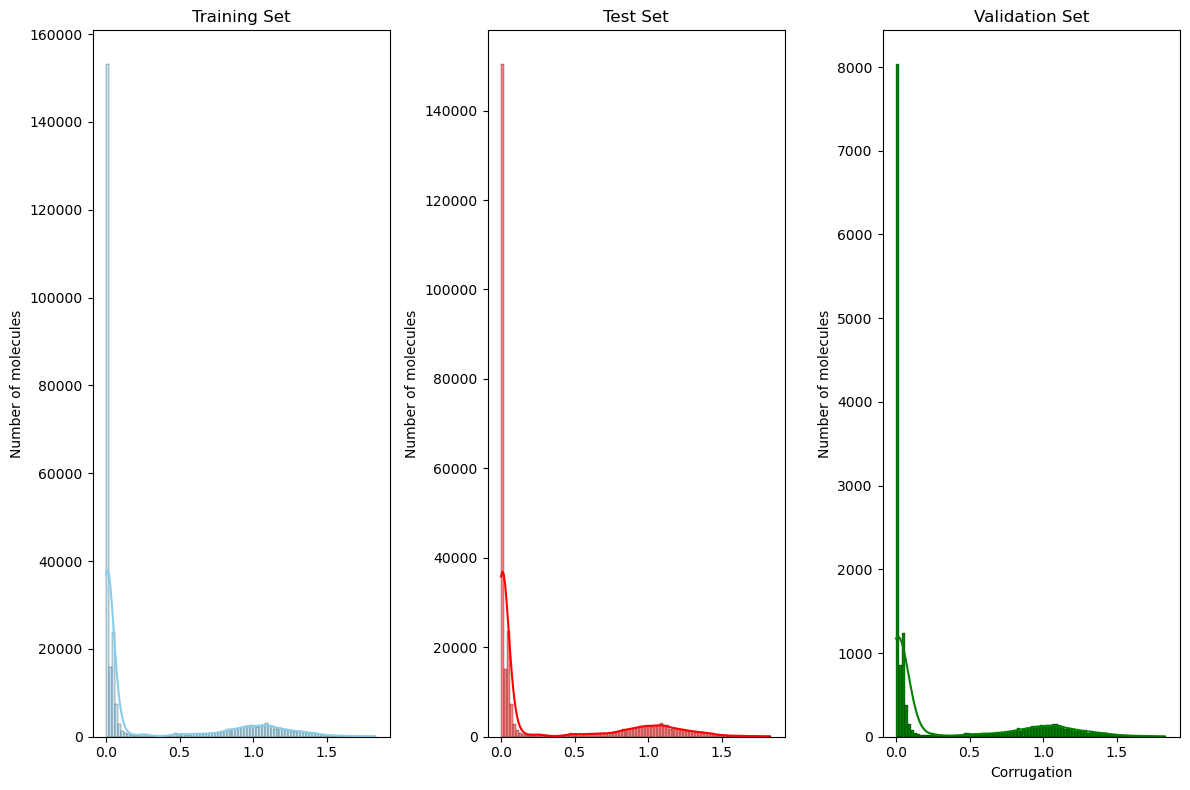

In [5]:
plt.rcParams.update(plt.rcParamsDefault)
fig, ax = plt.subplots(1, 3, figsize=(12, 8))  # added figsize for clarity

sns.histplot(data=dataset_df[dataset_df['split']=='train']['corrugation'], ax=ax[0], color="skyblue", label="training set",
             kde=True, stat='count', binwidth=0.02, alpha=0.5)
ax[0].set_title("Training Set")
ax[0].set_ylabel('Number of molecules')

ax[0].set_xlabel('')
sns.histplot(data=dataset_df[dataset_df['split']=='test']['corrugation'], ax=ax[1], color="red", label="test set",
             kde=True, stat='count', binwidth=0.02, alpha=0.5)
ax[1].set_title("Test Set")
ax[1].set_ylabel('Number of molecules')
ax[1].set_xlabel('')

sns.histplot(data=dataset_df[dataset_df['split']=='val']['corrugation'], ax=ax[2], color="green", label="validation set",
             kde=True, stat='count', binwidth=0.02, alpha=1)
ax[2].set_title("Validation Set")
ax[2].set_xlabel('Corrugation')
ax[2].set_ylabel('Number of molecules')
ax[2].set_xlabel('Corrugation')

# Using tight_layout to ensure that plots do not overlap
plt.tight_layout()
plt.show()


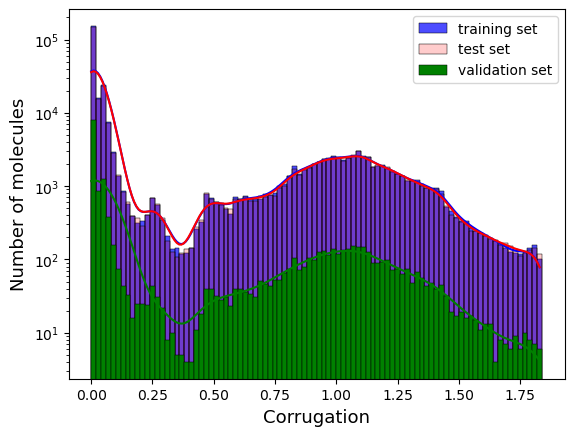

In [9]:
plt.rcParams.update(plt.rcParamsDefault)

sns.histplot(data=dataset_df[dataset_df['split']=='train']['corrugation'],  color="blue", label="training set",
             kde=True, stat='count', binwidth=0.02, alpha=0.7, log_scale=(False, 10))

sns.histplot(data=dataset_df[dataset_df['split']=='test']['corrugation'],  color="red", label="test set",
             kde=True, stat='count', binwidth=0.02, alpha=0.2, log_scale=(False, 10))

sns.histplot(data=dataset_df[dataset_df['split']=='val']['corrugation'],  color="green", label="validation set",
             kde=True, stat='count', binwidth=0.02, alpha=1, log_scale=(False, 10))

plt.xlabel('Corrugation', fontsize=13)
plt.ylabel('Number of molecules', fontsize=13)
plt.legend()

#plt.savefig("tanimoto_distributions_dropout_0_5_all_testset.pdf", format="pdf", bbox_inches="tight")
plt.show()


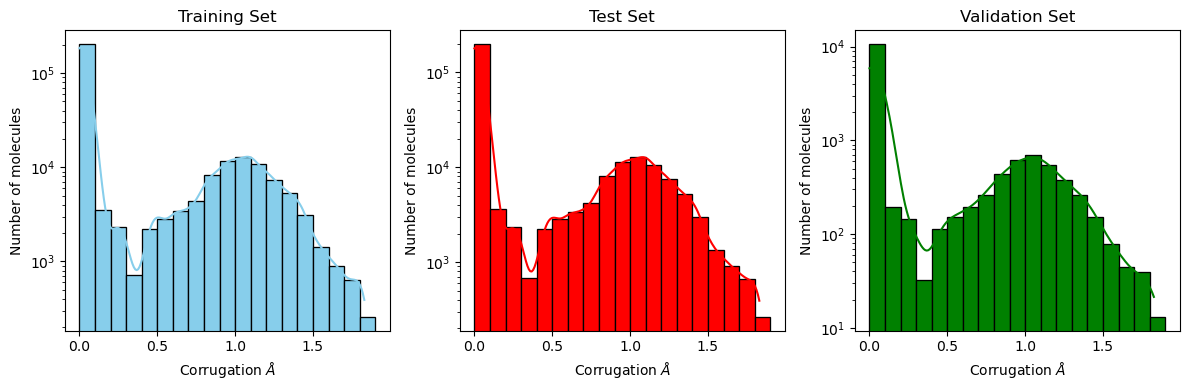

In [17]:
plt.rcParams.update(plt.rcParamsDefault)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))  # added figsize for clarity

sns.histplot(data=dataset_df[dataset_df['split']=='train']['corrugation'], ax=ax[0], color="skyblue", label="training set",
             kde=True, stat='count', binwidth=0.1, alpha=1, log_scale=(False, 10))
ax[0].set_title("Training Set")
ax[0].set_ylabel('Number of molecules')
ax[0].set_xlabel(r'Corrugation $\AA$')

sns.histplot(data=dataset_df[dataset_df['split']=='test']['corrugation'], ax=ax[1], color="red", label="test set",
             kde=True, stat='count', binwidth=0.1, alpha=1, log_scale=(False, 10))
ax[1].set_title("Test Set")
ax[1].set_ylabel('Number of molecules')
ax[1].set_xlabel(r'Corrugation $\AA$')
sns.histplot(data=dataset_df[dataset_df['split']=='val']['corrugation'], ax=ax[2], color="green", label="validation set",
             kde=True, stat='count', binwidth=0.1, alpha=1, log_scale=(False, 10))
ax[2].set_title("Validation Set")
ax[2].set_xlabel('Corrugation')
ax[2].set_ylabel('Number of molecules')
ax[2].set_xlabel(r'Corrugation $\AA$')

# Using tight_layout to ensure that plots do not overlap
plt.tight_layout()
plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/corrugation_histogram_all_sets.pdf', format="pdf", bbox_inches="tight")

plt.show()